<a href="https://colab.research.google.com/github/sewmi1996/Research/blob/main/OIMHSDataset_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/OIMHS dataset/Images/1"

# Initialize lists to store OCT images and ground truth images
oct_images = []
ground_truth_images = []

# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load combined image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Split image into left (OCT) and right (ground truth) parts
        height, width, _ = image.shape
        oct_image = image[:, :width//2]
        ground_truth_image = image[:, width//2:]
        # Append OCT image and ground truth image to respective lists
        oct_images.append(oct_image)
        ground_truth_images.append(ground_truth_image)

# Convert lists to numpy arrays
oct_images = np.array(oct_images)
ground_truth_images = np.array(ground_truth_images)

# Display the shapes of the arrays
print("OCT Images Shape:", len(oct_images))
print("Ground Truth Images Shape:", type(ground_truth_images[0]))

OCT Images Shape: 31
Ground Truth Images Shape: <class 'numpy.ndarray'>


In [2]:
import numpy as np

# Assuming image_array is your NumPy array representing the image
# Check the shape and data type of the array
print("Shape:", ground_truth_images.shape)
print("Data Type:", ground_truth_images.dtype)

# Flatten the array if necessary
ground_truth_images = ground_truth_images.reshape(-1, ground_truth_images.shape[-1])

# Check for unique colors
unique_colors = np.unique(ground_truth_images, axis=0)

# Print the number of unique colors
print("Number of Unique Colors:", unique_colors.shape[0])


Shape: (31, 512, 512, 3)
Data Type: uint8
Number of Unique Colors: 5


In [3]:
import numpy as np

def get_pixel_values_for_unique_colors(image_array):
    # Flatten the image array
    # flattened_array = image_array.reshape(-1, image_array.shape[-1])

    # Find unique colors and their counts
    unique_colors, color_counts = np.unique(image_array, axis=0, return_counts=True)

    # Initialize dictionary to store pixel values for each unique color
    color_pixel_values = {}

    # Iterate over unique colors
    for color_index, (color, count) in enumerate(zip(unique_colors, color_counts)):
        # Find pixels with the current color
        pixels_with_color = np.where(np.all(image_array == color, axis=-1))
        color_pixel_values[color_index] = {'color_value': color, 'pixel_values': pixels_with_color, 'count': count}

    return color_pixel_values

# Example usage
# Assuming ground_truth_images is your NumPy array representing the ground truth images
color_pixel_values = get_pixel_values_for_unique_colors(ground_truth_images)

# Print color values and corresponding pixel values for each unique color
for color_index, data in color_pixel_values.items():
    print("Color Index:", color_index)
    print("Color Value:", data['color_value'])
    print("Pixel Values:", data['pixel_values'])
    print("Count:", data['count'])


Color Index: 0
Color Value: [0 0 0]
Pixel Values: (array([      0,       1,       2, ..., 8126461, 8126462, 8126463]),)
Count: 6636955
Color Index: 1
Color Value: [  0   0 255]
Pixel Values: (array([3541250, 3541251, 3541252, ..., 6743321, 6743322, 6743323]),)
Count: 11032
Color Index: 2
Color Value: [  0 255   0]
Pixel Values: (array([  99327,   99838,   99839, ..., 8036128, 8036129, 8036130]),)
Count: 1061608
Color Index: 3
Color Value: [  0 255 255]
Pixel Values: (array([ 137216,  137728,  137729, ..., 8058667, 8058668, 8058669]),)
Count: 403051
Color Index: 4
Color Value: [255   0   0]
Pixel Values: (array([ 940783,  940784,  940785, ..., 7478727, 7478728, 7479239]),)
Count: 13818


In [4]:
# RGB color values
rgb_color = [255  , 0,   0]

# Convert each channel value to hexadecimal and concatenate
hex_color = '#{:02x}{:02x}{:02x}'.format(rgb_color[0], rgb_color[1], rgb_color[2])

print("Hexadecimal color value:", hex_color)


Hexadecimal color value: #ff0000


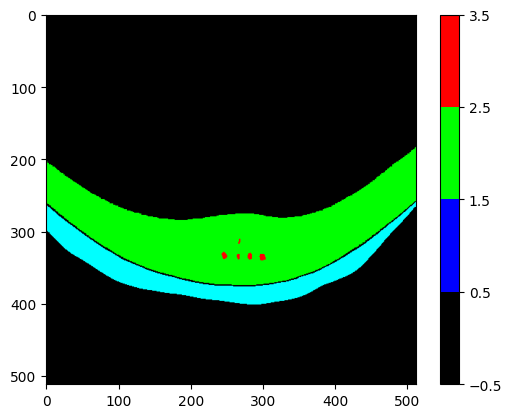

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = mpl.colors.ListedColormap(['#000000', '#0000ff', '#00ff00', '#00ffff','#ff0000'])
norm = mpl.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

image_array = ground_truth_images.reshape((31,512,512,3))

plt.imshow(image_array[15], cmap=cmap, norm=norm)
plt.colorbar()

In [6]:
import os
import cv2
import numpy as np

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/OIMHS dataset/Images/1"

# Initialize lists to store OCT images and ground truth images
oct_images = []
ground_truth_images = []

# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load combined image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Split image into left (OCT) and right (ground truth) parts
        height, width, _ = image.shape
        oct_image = image[:, :width//2]
        ground_truth_image = image[:, width//2:]
        # Append OCT image and ground truth image to respective lists
        oct_images.append(oct_image)
        ground_truth_images.append(ground_truth_image)

# Convert lists to numpy arrays
oct_images = np.array(oct_images)
ground_truth_images = np.array(ground_truth_images)

# Display the shapes of the arrays
print("OCT Images Shape:", len(oct_images))

OCT Images Shape: 31


In [7]:
from sklearn.model_selection import train_test_split

# Function to preprocess images
def preprocess_images(images, target_size):
    preprocessed_images = []
    for img in images:
        # Resize image to target size
        resized_img = cv2.resize(img, target_size)
        # Normalize pixel values to range [0, 1]
        normalized_img = resized_img.astype('float32') / 255.0
        preprocessed_images.append(normalized_img)
    return np.array(preprocessed_images)

# Define target size for resizing
target_size = (512, 512)  # Adjust as needed

# Preprocess OCT images
oct_images_preprocessed = preprocess_images(oct_images, target_size)

# Preprocess ground truth images (if needed)
# Assuming ground truth images are binary masks
ground_truth_masks_preprocessed = preprocess_images(ground_truth_images, target_size)

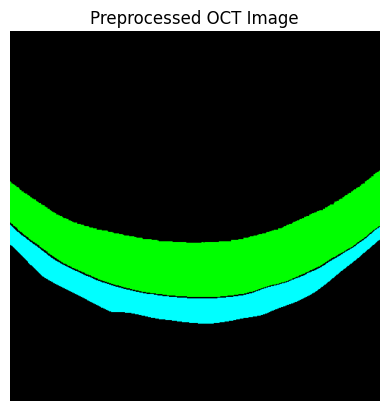

In [8]:
import matplotlib.pyplot as plt

# Assuming oct_images_preprocessed is your preprocessed array of OCT images
single_image = ground_truth_masks_preprocessed[0]  # Selecting the first image for visualization

# Display the image
plt.imshow(single_image)
plt.title('Preprocessed OCT Image')
plt.axis('off')  # Turn off axis
plt.show()


In [9]:
flattened_array = ground_truth_masks_preprocessed.reshape(-1, ground_truth_masks_preprocessed.shape[-1])
unique_colors = np.unique((flattened_array * 255).astype(int),axis=0)
num_unique_colors = len(unique_colors)
print("Number of unique colors:", num_unique_colors)


Number of unique colors: 5


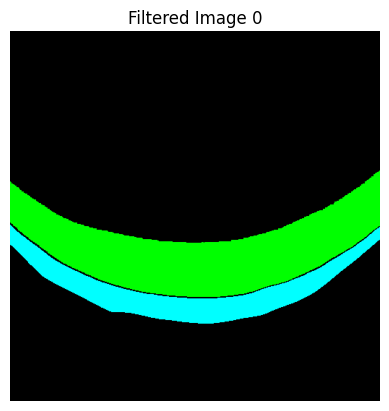

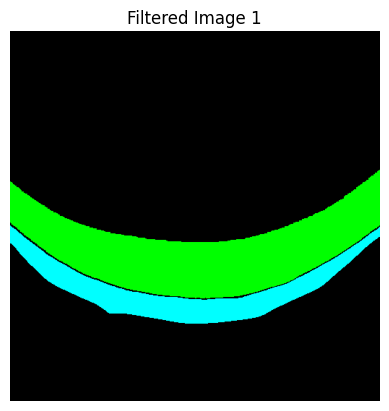

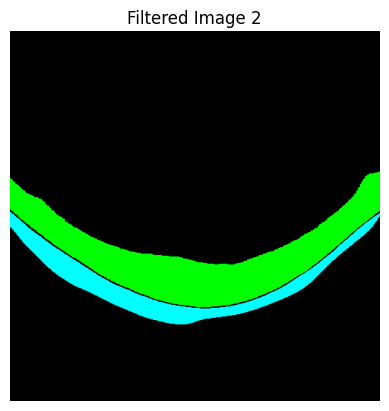

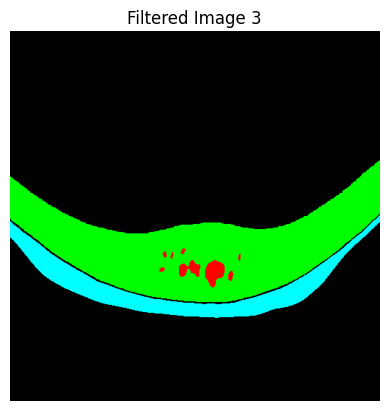

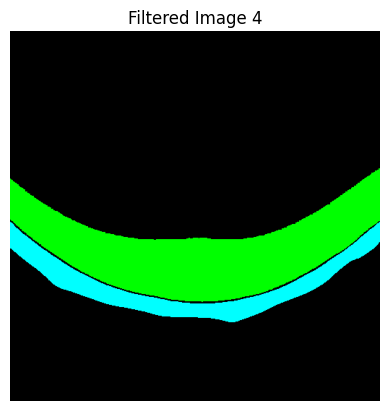

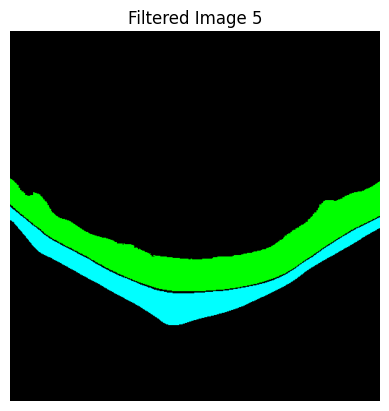

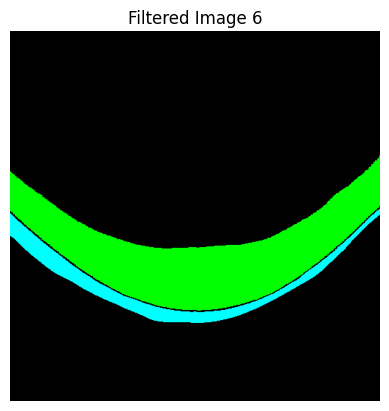

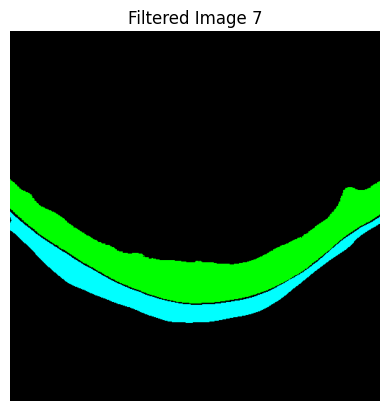

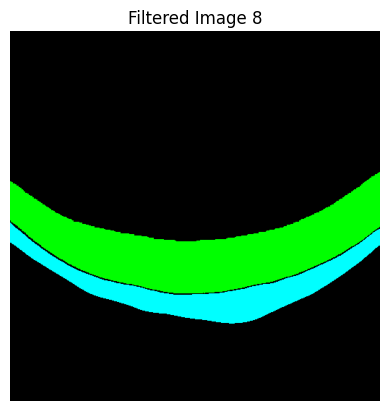

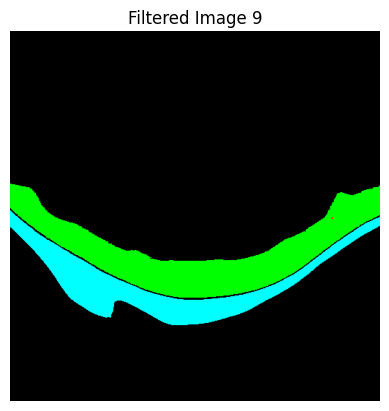

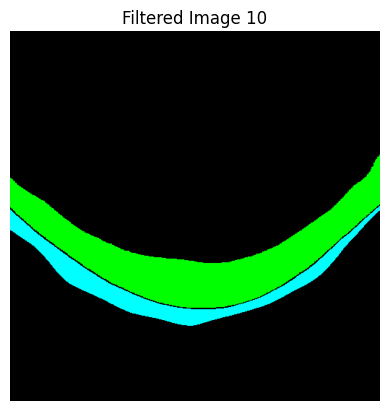

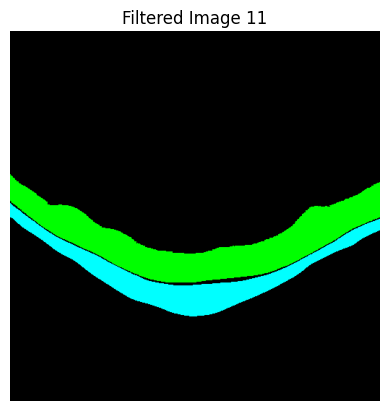

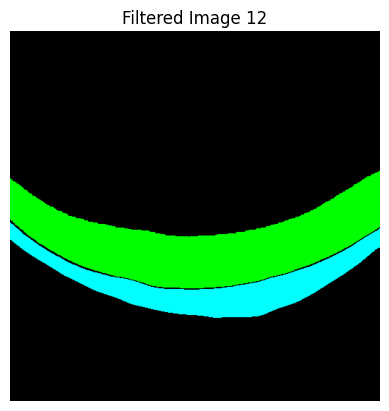

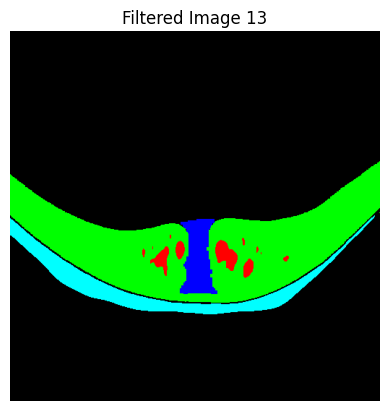

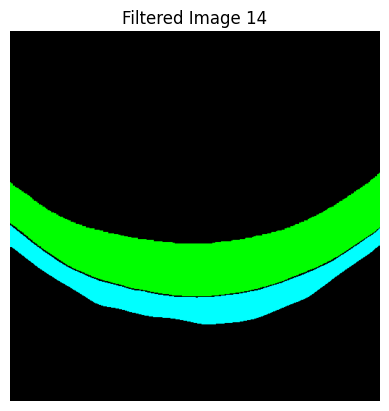

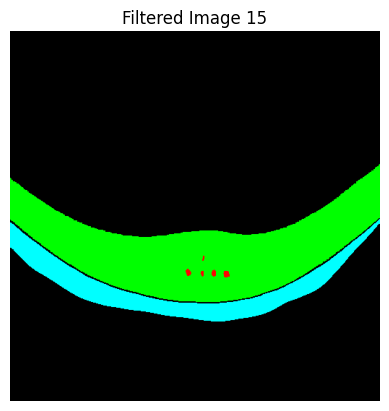

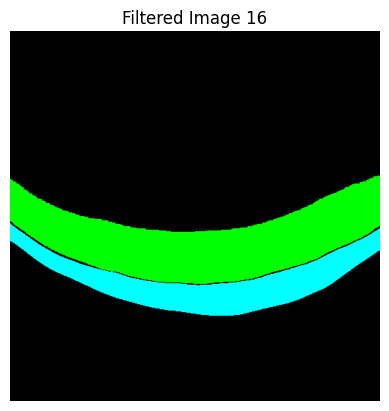

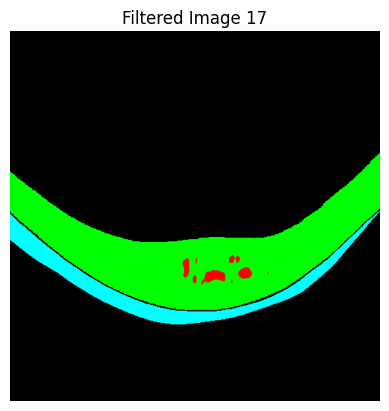

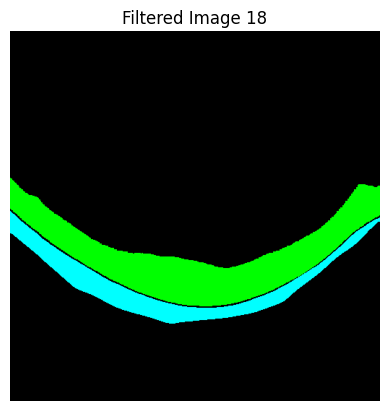

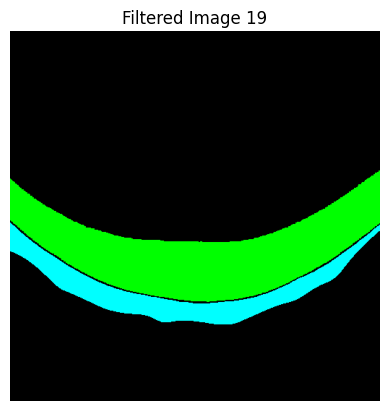

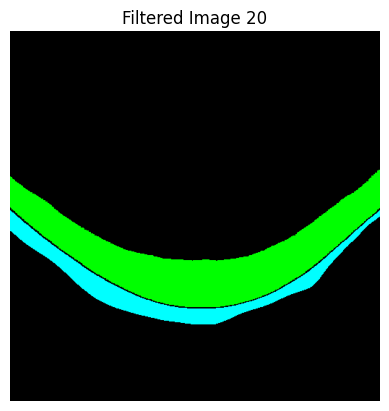

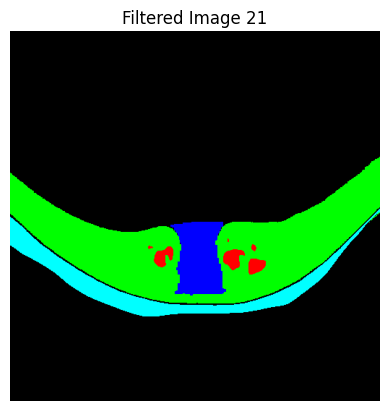

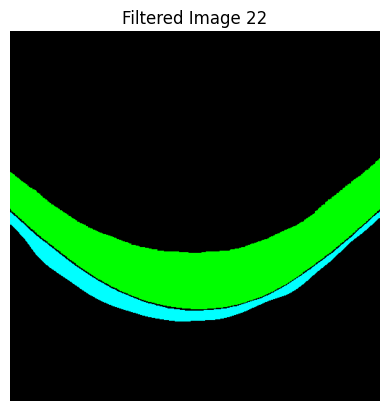

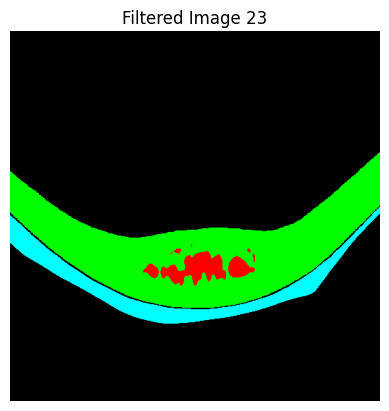

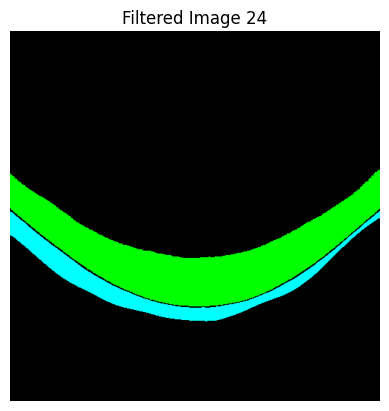

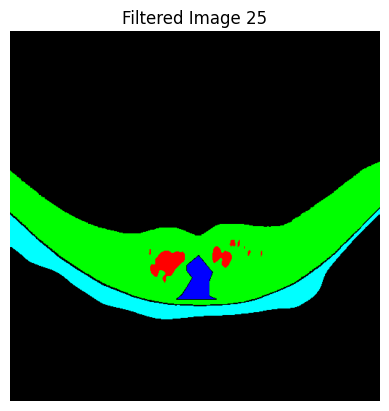

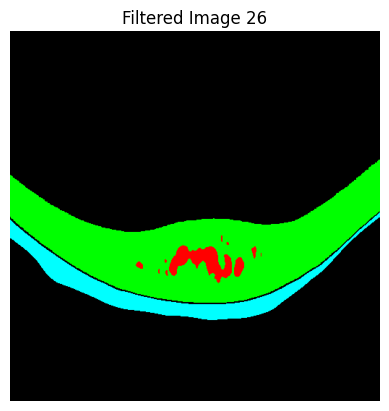

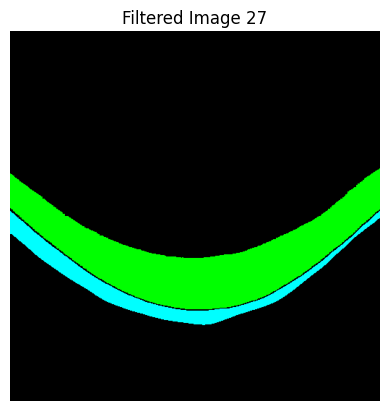

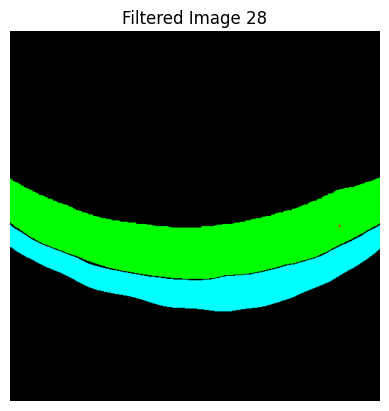

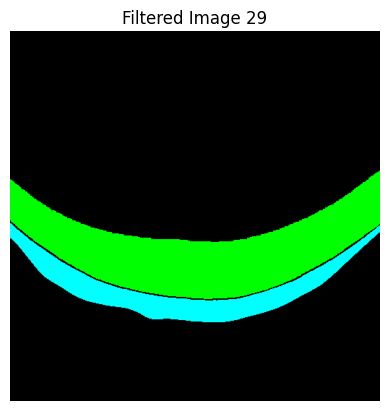

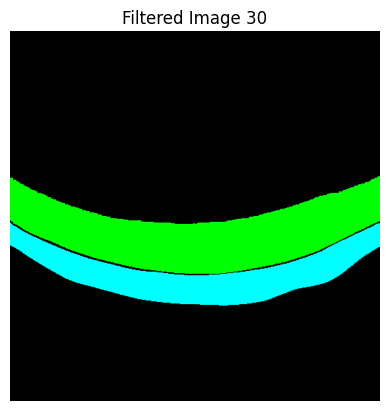

In [10]:
import numpy as np

def filter_colors(image_array, colors_to_filter):
    filtered_images = []

    for image in image_array:
        filtered_image = np.copy(image)  # Create a copy of the original image to preserve it
        for color in colors_to_filter:
            mask = np.all(filtered_image == color, axis=-1)  # Create mask for the current color
            filtered_image[mask] = [255, 255, 255]  # Set pixels of the current color to white (or any other desired color)
        filtered_images.append(filtered_image)

    return np.array(filtered_images)

# Define the colors to filter out
colors_to_filter = [ [0, 0, 255], [0, 255, 0], [0, 255, 255], [255, 0, 0]]

# Apply filtering to the ground truth images array
masks = filter_colors(ground_truth_masks_preprocessed, colors_to_filter)
# Display the filtered images
for i, filtered_image in enumerate(masks):
    plt.imshow(filtered_image)
    plt.title(f'Filtered Image {i}')
    plt.axis('off')
    plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(oct_images_preprocessed, masks, test_size=0.2, random_state=42)


In [12]:
# Print shapes for verification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (24, 512, 512, 3)
y_train shape: (24, 512, 512, 3)
X_val shape: (7, 512, 512, 3)
y_val shape: (7, 512, 512, 3)


In [13]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from keras.models import Model

# Define input shape with 3 channels
inputs = Input((512, 512, 3))

# Encoder
c1_1 = Conv2D(8, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(inputs)
c1_2 = Conv2D(8, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c1_1)
p1 = MaxPooling2D((2, 2))(c1_2)

c2_1 = Conv2D(12, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p1)
c2_2 = Conv2D(12, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c2_1)
p2 = MaxPooling2D((2, 2))(c2_2)

c3_1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p2)
c3_2 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c3_1)
p3 = MaxPooling2D((2, 2))(c3_2)

c4_1 = Conv2D(24, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p3)
c4_2 = Conv2D(24, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c4_1)
p4 = MaxPooling2D((2, 2))(c4_2)

c5_1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p4)
c5_2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c5_1)

# Decoder
c6_t = Conv2DTranspose(24, (2, 2), strides=(2, 2), padding='same')(c5_2)
c6_c = concatenate([c6_t, c4_2])
c6_1 = Conv2D(24, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c6_c)
c6_2 = Conv2D(24, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c6_1)

c7_t = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c6_2)
c7_c = concatenate([c7_t, c3_2])
c7_1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c7_c)
c7_2 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c7_1)

c8_t = Conv2DTranspose(12, (2, 2), strides=(2, 2), padding='same')(c7_2)
c8_c = concatenate([c8_t, c2_2])
c8_1 = Conv2D(12, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c8_c)
c8_2 = Conv2D(12, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c8_1)

c9_t = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c8_2)
c9_c = concatenate([c9_t, c1_2])
c9_1 = Conv2D(8, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c9_c)
c9_2 = Conv2D(8, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c9_1)

# Output layer with 3 channels
outputs = Conv2D(3, (1, 1), activation='sigmoid')(c9_2)

# Define the model
model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 8)          224       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 8)          584       ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 256, 256, 8)          0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [14]:
# Train the model
results = model.fit(X_train,y_train, validation_data=(X_val, y_val), batch_size=11, epochs=10)

Epoch 1/10
3/3 [==============================] - 33s 8s/step - loss: 0.7671 - val_loss: 0.5880
Epoch 2/10
3/3 [==============================] - 29s 9s/step - loss: 0.5562 - val_loss: 0.4655
Epoch 3/10
3/3 [==============================] - 27s 8s/step - loss: 0.4493 - val_loss: 0.3990
Epoch 4/10
3/3 [==============================] - 28s 8s/step - loss: 0.3894 - val_loss: 0.3579
Epoch 5/10
3/3 [==============================] - 28s 9s/step - loss: 0.3526 - val_loss: 0.3336
Epoch 6/10
3/3 [==============================] - 28s 9s/step - loss: 0.3316 - val_loss: 0.3197
Epoch 7/10
3/3 [==============================] - 25s 8s/step - loss: 0.3191 - val_loss: 0.3105
Epoch 8/10
3/3 [==============================] - 26s 8s/step - loss: 0.3111 - val_loss: 0.3049
Epoch 9/10
3/3 [==============================] - 28s 8s/step - loss: 0.3049 - val_loss: 0.2975
Epoch 10/10
3/3 [==============================] - 28s 7s/step - loss: 0.2975 - val_loss: 0.2907


1/1 [==============================] - 2s 2s/step


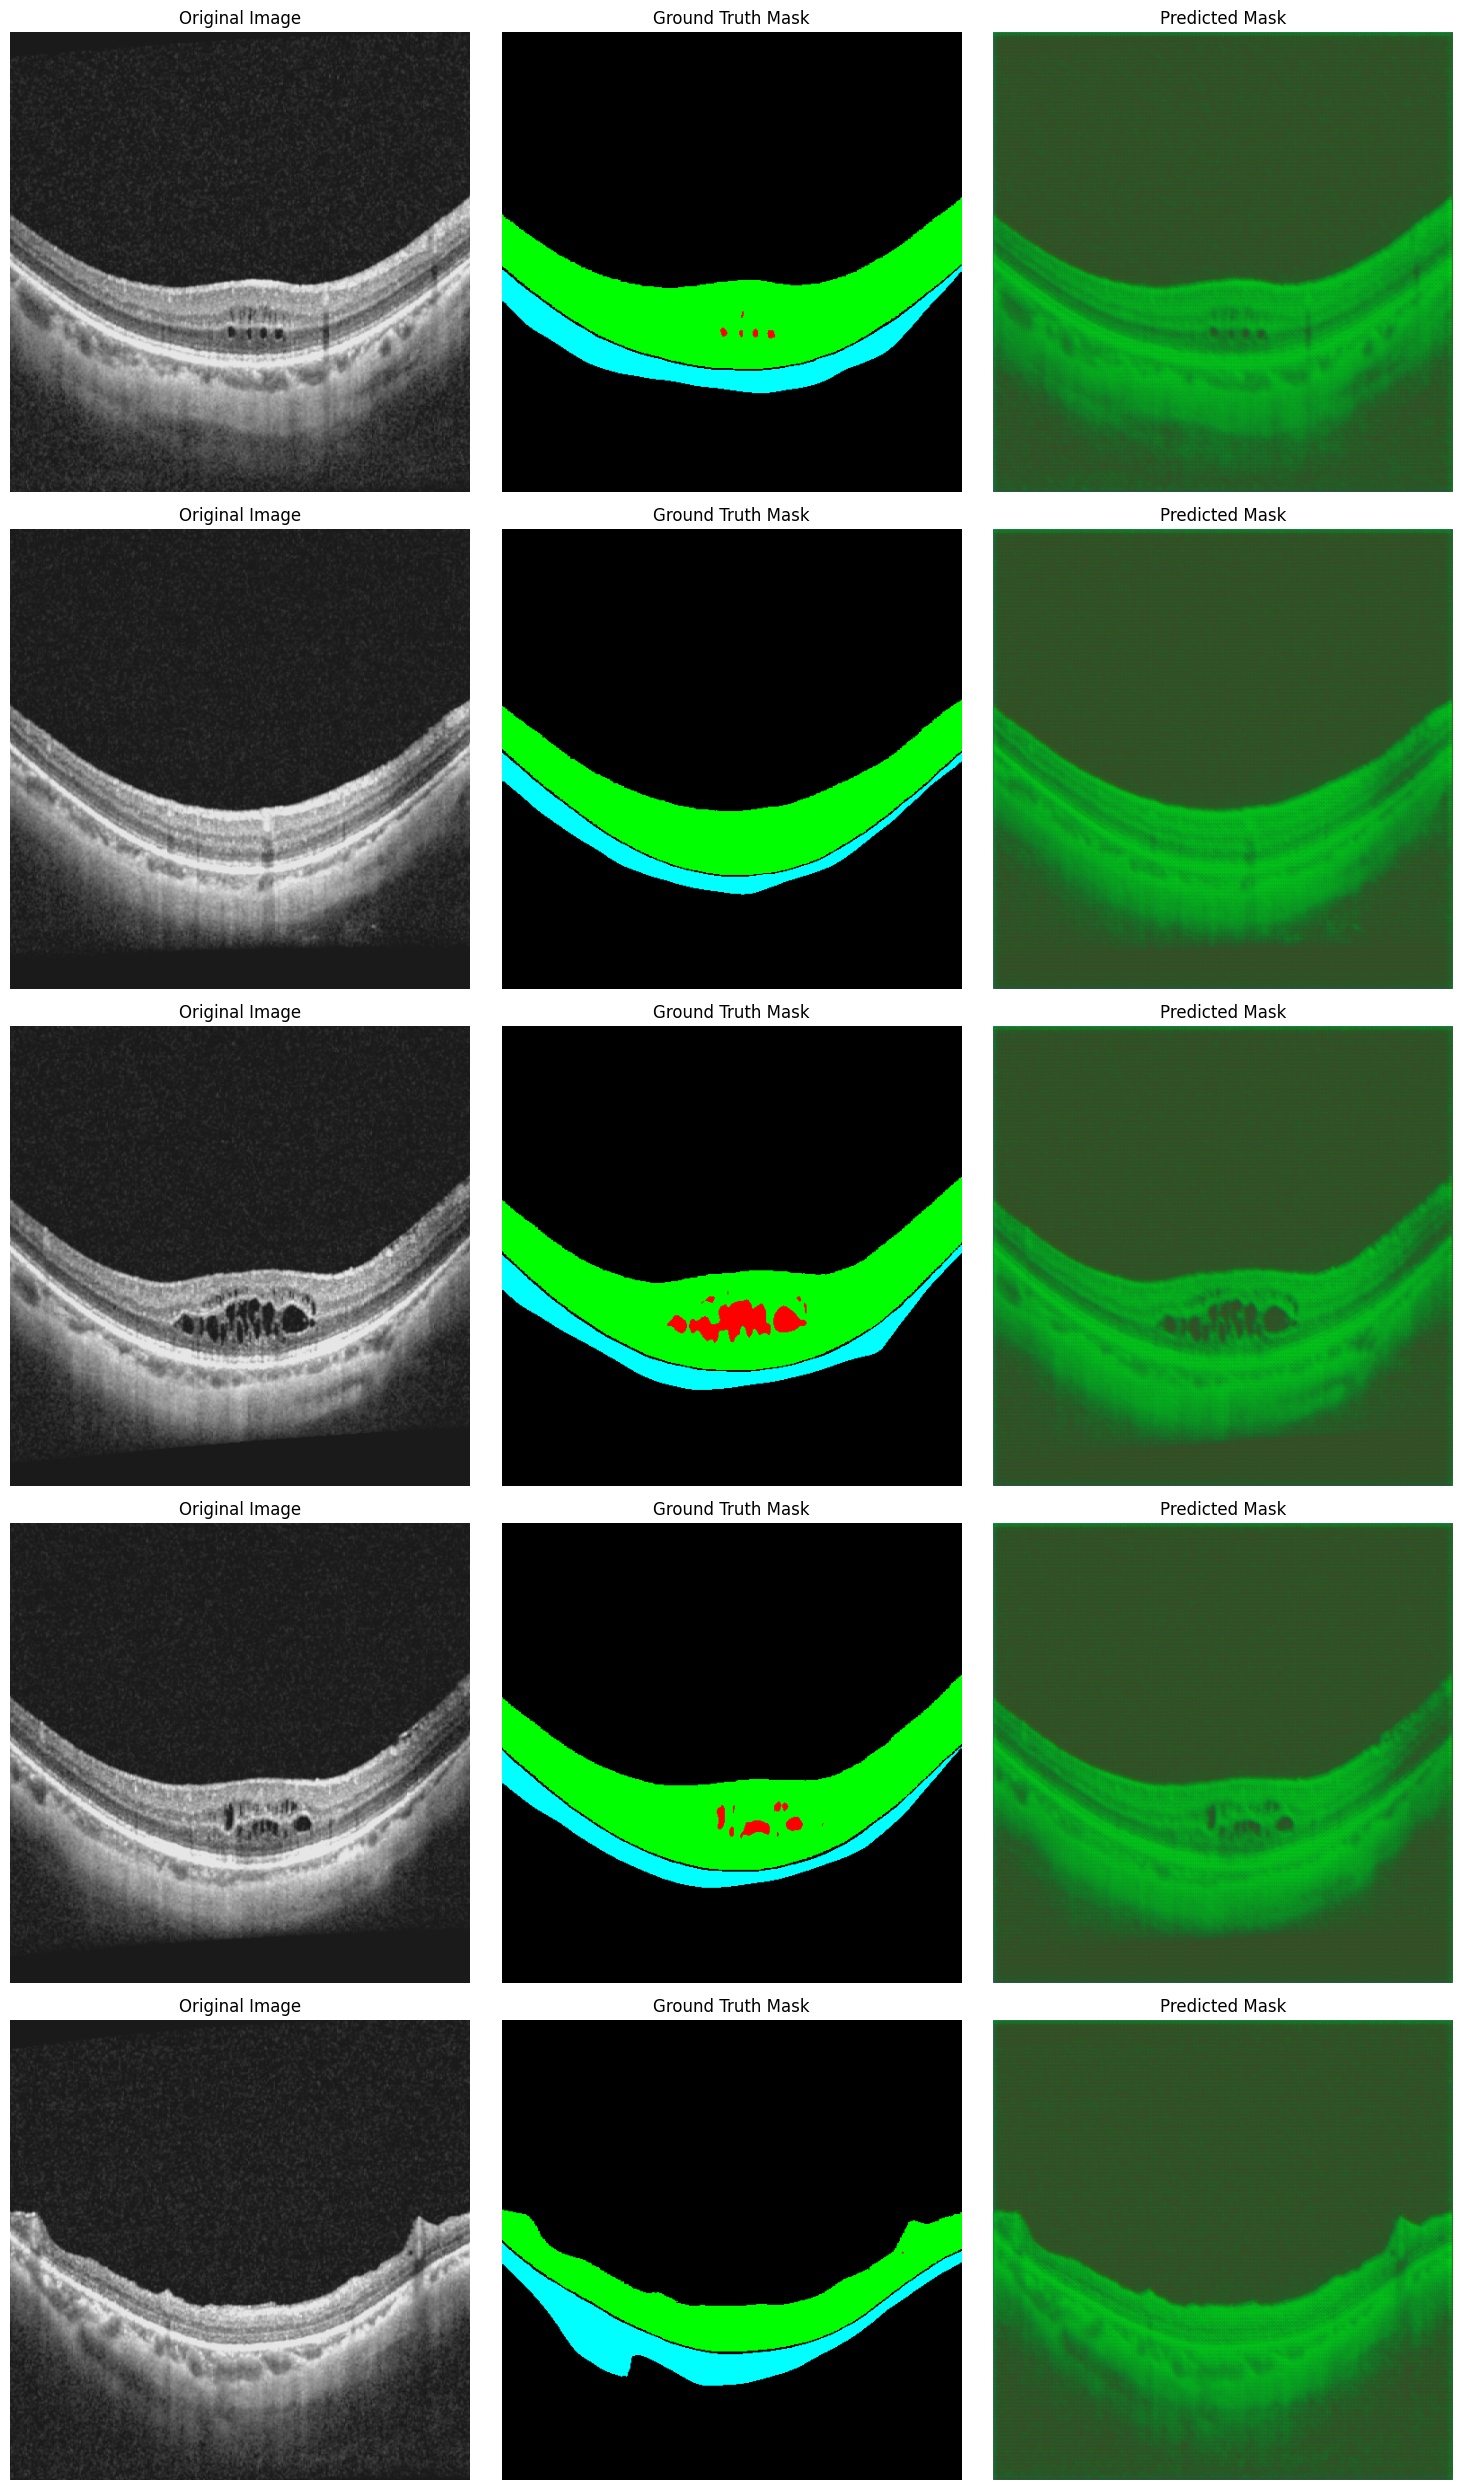

In [15]:
import matplotlib.pyplot as plt


# Predict segmentation masks for testing data
predicted_masks = model.predict(X_val)

# Choose a few random samples for visualization
num_samples = 5
sample_indices = np.random.choice(len(X_val), num_samples, replace=False)

# Plot the original images, ground truth masks, and predicted masks
plt.figure(figsize=(15, 5*num_samples))
for i, idx in enumerate(sample_indices):
    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(X_val[idx])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.imshow(y_val[idx], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 3)
    plt.imshow(predicted_masks[idx], cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)
    dice = (2. * intersection) / (union + 1e-8)  # Add a small epsilon to avoid division by zero
    return dice

# Assuming you have ground truth masks and predicted masks
# For binary segmentation, you can threshold the predicted masks to obtain binary masks
threshold = 0.5  # Adjust threshold as needed
binary_predicted_masks = (predicted_masks > threshold).astype(np.uint8)

# Compute Dice coefficient for each sample
dice_scores = []
for i in range(len(y_val)):
    dice_scores.append(dice_coefficient(y_val[i], binary_predicted_masks[i]))

# Compute mean Dice coefficient
mean_dice_coefficient = np.mean(dice_scores)
print("Mean Dice Coefficient:", mean_dice_coefficient)

Mean Dice Coefficient: 0.6954670058166149


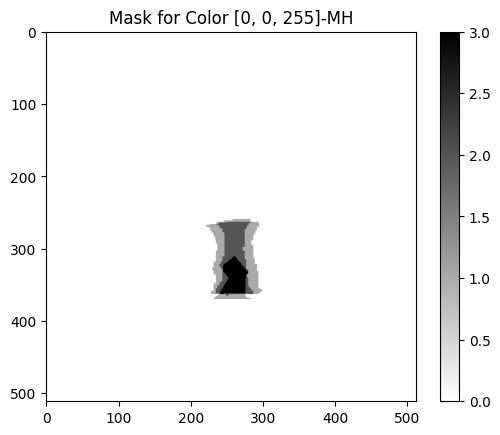

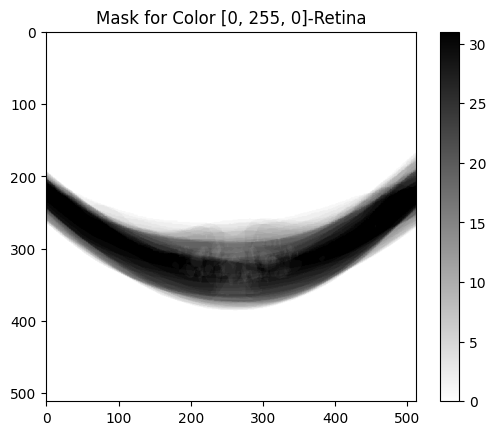

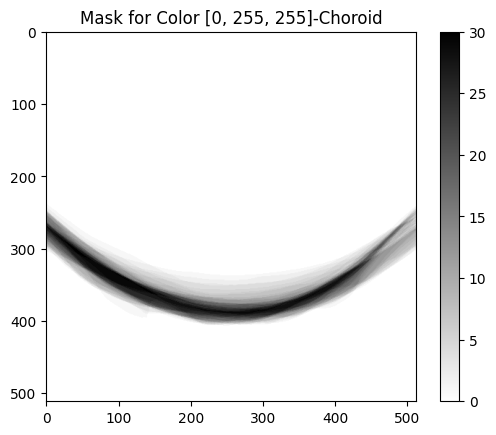

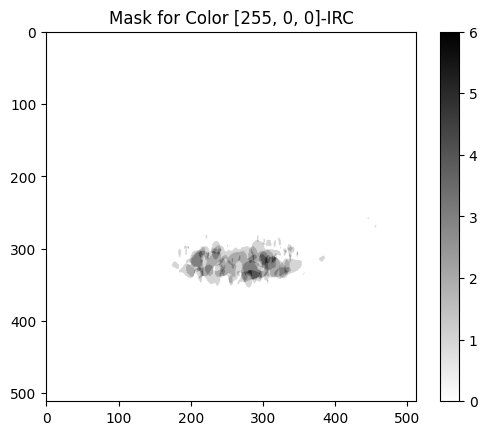

<class 'list'>
4


In [17]:
import numpy as np

# Define the list of available colors
available_colors = [[0, 0, 255], [0, 255, 0], [0, 255, 255], [255, 0, 0]]

# Initialize empty lists to store masks for each color
color_masks = [[] for _ in range(len(available_colors))]

# Iterate through ground truth images
for image in ground_truth_images:
    # Iterate through available colors
    for color_index, color in enumerate(available_colors):
        # Create mask for current color
        color_mask = np.all(image == color, axis=-1).astype(np.uint8)
        # Append the mask to the list corresponding to the color index
        color_masks[color_index].append(color_mask)

# Convert lists of masks to numpy arrays
color_masks = [np.stack(masks) for masks in color_masks]

classes=['MH','Retina','Choroid','IRC']
# Visualize the masks for each color
for i, color_mask_array in enumerate(color_masks):
    # Combine masks into a single mask
    color_mask = np.sum(color_mask_array, axis=0)
    plt.imshow(color_mask, cmap='binary')
    plt.colorbar()
    plt.title(f'Mask for Color {available_colors[i]}-{classes[i]}')
    plt.show()


print(type(color_masks))
print(len(color_masks))



In [18]:
samples=oct_images_preprocessed
# Split the dataset into train and validation sets
samples_train, samples_val = train_test_split(samples, test_size=0.2, random_state=42)

# Split the train set into the real train set and in a test set
samples_train, samples_test = train_test_split(samples_train, test_size=0.15, random_state=42)

# Print data distribution (Train: 68%, Test: 12%, Val: 20%)
print(f"Train length: {len(samples_train)}")
print(f"Validation length: {len(samples_val)}")
print(f"Test length: {len(samples_test)}")

Train length: 20
Validation length: 7
Test length: 4


In [19]:
import numpy as np

# Define the list of available colors
available_colors = [[0,0,0],[0, 0, 255], [0, 255, 0], [0, 255, 255], [255, 0, 0]]

# Create an empty array to store the one-hot encoded representations for the ground truth images
one_hot_encoded_images = []

# Iterate through each ground truth image
for image in ground_truth_images:
    # Create an empty array to store the one-hot encoded representation for the current image
    one_hot_encoded_image = np.zeros((image.shape[0], image.shape[1], len(available_colors)), dtype=np.uint8)

    # Iterate through each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Get the color of the current pixel
            pixel_color = image[i, j]
            # Find the index of the color in the list of available colors
            color_index = None
            for idx, color in enumerate(available_colors):
                if np.array_equal(pixel_color, color):
                    color_index = idx
                    break
            if color_index is None:
                raise ValueError("Color not found in available colors.")
            # Set the corresponding entry in the one-hot encoded representation to 1
            one_hot_encoded_image[i, j, color_index] = 1

    # Append the one-hot encoded representation of the current image to the list
    one_hot_encoded_images.append(one_hot_encoded_image)

# Convert the list of one-hot encoded representations to a numpy array
one_hot_encoded_images = np.array(one_hot_encoded_images)



In [20]:
one_hot_encoded_images.shape
# oct_images_preprocessed.shape

(31, 512, 512, 5)

In [21]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dropout
ker_init='he_normal'
dropout=0.2
# Define input shape with 3 channels
inputs = Input((512, 512, 3))

conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)

pool = MaxPooling2D(pool_size=(2, 2))(conv1)
conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)

pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)

pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
drop5 = Dropout(dropout)(conv5)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(drop5))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv8))
merge9 = concatenate([conv,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)

up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv9))
merge = concatenate([conv1,up], axis = 3)
conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

conv10 = Conv2D(4, 1, activation = 'softmax')(conv)

# Output layer with 5 channels
outputs = Conv2D(5, 1, activation = 'softmax')(conv)

# Define the model
model2 = Model(inputs=[inputs], outputs=[outputs])
model2.compile(optimizer='adam', loss='binary_crossentropy')
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 512, 512, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 512, 512, 32)         9248      ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 256, 256, 32)         0         ['conv2d_20[0][0]']           
 g2D)                                                                                       

In [22]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(oct_images, one_hot_encoded_images, test_size=0.2, random_state=42)

In [ ]:
# Train the model
results2 = model2.fit(X_train2,y_train2, validation_data=(X_val2, y_val2), batch_size=11, epochs=10)

Epoch 1/10
3/3 [==============================] - 264s 73s/step - loss: 155.5300 - val_loss: 3.6177
Epoch 2/10
3/3 [==============================] - 251s 74s/step - loss: 2.9722 - val_loss: 0.9821
Epoch 3/10
3/3 [==============================] - 248s 72s/step - loss: 0.9421 - val_loss: 0.7711
Epoch 4/10
3/3 [==============================] - 251s 73s/step - loss: 0.7394 - val_loss: 0.6052
Epoch 5/10
3/3 [==============================] - 248s 73s/step - loss: 0.6379 - val_loss: 0.5692
Epoch 6/10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert one-hot encoded masks to single-channel masks
def onehot_to_single_channel(masks):
    return np.argmax(masks, axis=-1)

# Predict segmentation masks for testing data
predicted_masks2 = model2.predict(X_val2)

# Convert one-hot encoded ground truth masks to single-channel masks
y_val2_single_channel = onehot_to_single_channel(y_val2)

# Convert one-hot encoded predicted masks to single-channel masks
predicted_masks2_single_channel = onehot_to_single_channel(predicted_masks2)

# Choose a few random samples for visualization
num_samples = 5
sample_indices2 = np.random.choice(len(X_val2), num_samples, replace=False)

# Plot the original images, ground truth masks, and predicted masks
plt.figure(figsize=(15, 5*num_samples))
for i, idx in enumerate(sample_indices2):
    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(X_val2[idx])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.imshow(y_val2_single_channel[idx], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 3)
    plt.imshow(predicted_masks2_single_channel[idx], cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# Calculate the pixel-wise absolute difference between ground truth and predicted masks
segmentation_error = np.abs(y_val2_single_channel - predicted_masks2_single_channel)

# Choose a few random samples for visualization
num_samples = 5
sample_indices2 = np.random.choice(len(X_val2), num_samples, replace=False)

# Plot the segmentation error for each sample
plt.figure(figsize=(15, 5*num_samples))
for i, idx in enumerate(sample_indices2):
    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(X_val2[idx])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.imshow(segmentation_error[idx], cmap='gray', vmin=0, vmax=1)  # Use vmin and vmax to set color range
    plt.title('Segmentation Error')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    dice = (2.0 * intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice

# Calculate Dice coefficient for each sample
dice_scores = []
for i in range(len(y_val2)):
    dice = dice_coefficient(y_val2_single_channel[i], predicted_masks2_single_channel[i])
    dice_scores.append(dice)

# Calculate the average Dice coefficient
average_dice = np.mean(dice_scores)
print("Average Dice Coefficient:", average_dice)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each class
class_colors = {
    0: [0,0,0],
    1: [0, 0, 255],
    2: [0, 255, 0],
    3: [0, 255, 255],
    4:[255, 0, 0]
}

# Function to convert one-hot encoded masks to single-channel masks
def onehot_to_single_channel(masks):
    return np.argmax(masks, axis=-1)

# Predict segmentation masks for testing data
predicted_masks2 = model2.predict(X_val2)

# Convert one-hot encoded ground truth masks to single-channel masks
y_val2_single_channel = onehot_to_single_channel(y_val2)

# Convert one-hot encoded predicted masks to single-channel masks
predicted_masks2_single_channel = onehot_to_single_channel(predicted_masks2)

# Choose a few random samples for visualization
num_samples = 5
sample_indices2 = np.random.choice(len(X_val2), num_samples, replace=False)

# Plot the original images, ground truth masks, and predicted masks
plt.figure(figsize=(15, 5*num_samples))
for i, idx in enumerate(sample_indices2):
    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(X_val2[idx])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 2)
    ground_truth_mask = np.zeros_like(X_val2[idx])  # Initialize with black background
    for class_id, color in class_colors.items():
        ground_truth_mask[y_val2_single_channel[idx] == class_id] = color
    plt.imshow(ground_truth_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 3)
    predicted_mask = np.zeros_like(X_val2[idx])  # Initialize with black background
    for class_id, color in class_colors.items():
        predicted_mask[predicted_masks2_single_channel[idx] == class_id] = color
    plt.imshow(predicted_mask)
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
predicted_masks2_f=predicted_masks2[0]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def post_process_segmentation(predicted_seg):
    # Get the index of the class with the highest probability for each pixel
    single_channel_seg = np.argmax(predicted_seg, axis=-1)

    # Remove the background layer (class 0) and convert it to NaN
    # single_channel_seg[single_channel_seg == 0] = 0

    # Convert the array to a float to facilitate the conversion of 0 values to NaN
    # single_channel_seg = single_channel_seg.astype(float)

    return single_channel_seg

# Example usage
# Example predicted segmentation (probability map)
processed_seg = post_process_segmentation(predicted_masks2_f)
cmap = mpl.colors.ListedColormap(['#000000', '#0000ff', '#00ff00', '#00ffff','#ff0000'])
# Visualize the processed segmentation
plt.imshow(processed_seg, cmap=cmap)  # You can use any colormap you prefer
plt.colorbar()
plt.title('Processed Segmentation')
plt.axis('off')
plt.show()



In [ ]:
from scipy import ndimage

def post_process_segmentation(predicted_seg):
    # Get the index of the class with the highest probability for each pixel
    single_channel_seg = np.argmax(predicted_seg, axis=-1)

    # Convert the array to a binary mask where non-background pixels are set to 1 and background pixels are set to 0
    binary_mask = (single_channel_seg > 0).astype(np.uint8)

    # Fill holes in the binary mask
    filled_mask = ndimage.binary_fill_holes(binary_mask)

    return filled_mask.astype(float)

# Example usage
processed_seg = post_process_segmentation(predicted_masks2_f)

# Visualize the processed segmentation
plt.imshow(processed_seg, cmap=cmap)  # You can use any colormap you prefer
plt.colorbar()
plt.title('Processed Segmentation (Filled Holes)')
plt.axis('off')
plt.show()



In [ ]:
import numpy as np

# Define the list of available colors and their corresponding class labels
available_colors = {
    (0, 0, 0): 0,    # Background
    (0, 0, 255): 1,  # Class 1
    (0, 255, 0): 2,  # Class 2
    (0, 255, 255): 3,  # Class 3
    (255, 0, 0): 4   # Class 4
}

# Initialize empty lists to store masks for each color
color_masks = [[] for _ in range(len(available_colors))]

# Iterate through ground truth images
for image in ground_truth_images:
    # Iterate through available colors
    for color,color_index in available_colors.items():
        # Create mask for current color
        color_mask = np.all(image == color, axis=-1).astype(np.uint8)
        # Append the mask to the list corresponding to the color index
        color_masks[color_index].append(color_mask)


In [ ]:
# Convert the lists of masks into numpy arrays
class_masks = [np.array(masks) for masks in color_masks]
color_masks=np.array(list(color_masks))
print(color_masks.shape)
# Reshape the array
color_masks_reshaped_array = color_masks.transpose((1, 2, 3, 0))

# Check the shape of the reshaped array
print(color_masks_reshaped_array.shape)  # Output: (31, 512, 512, 5)

In [ ]:
# Split data into training and validation sets
X_train3, X_val3, y_train3, y_val3 = train_test_split(oct_images, color_masks_reshaped_array, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dropout
ker_init='he_normal'
dropout=0.2
# Define input shape with 3 channels
inputs = Input((512, 512, 3))

conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)

pool = MaxPooling2D(pool_size=(2, 2))(conv1)
conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)

pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)

pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
drop5 = Dropout(dropout)(conv5)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(drop5))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv8))
merge9 = concatenate([conv,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)

up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv9))
merge = concatenate([conv1,up], axis = 3)
conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

conv10 = Conv2D(4, 1, activation = 'softmax')(conv)

# Output layer with 3 channels
outputs = Conv2D(5, 1, activation = 'softmax')(conv)

# Define the model
model3 = Model(inputs=[inputs], outputs=[outputs])
model3.compile(optimizer='adam', loss='binary_crossentropy')
model3.summary()

In [ ]:
# Train the model
results3 = model3.fit(X_train3,y_train3, validation_data=(X_val3, y_val3), batch_size=11, epochs=10)

In [ ]:
# Predict segmentation masks for testing data
predicted_masks3 = model3.predict(X_val3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each class
class_colors = {
    0: [0,0,0],
    1: [0, 0, 255],
    2: [0, 255, 0],
    3: [0, 255, 255],
    4:[255, 0, 0]
}

# Function to convert one-hot encoded masks to single-channel masks
def seg_to_single_channel(masks):
    return np.argmax(masks, axis=-1)

# Predict segmentation masks for testing data
predicted_masks3 = model2.predict(X_val3)

# Convert ground truth masks to single-channel masks
y_val3_single_channel = seg_to_single_channel(y_val3)

# Convert predicted masks to single-channel masks
predicted_masks3_single_channel = seg_to_single_channel(predicted_masks3)

# Choose a few random samples for visualization
num_samples = 5
sample_indices3 = np.random.choice(len(X_val3), num_samples, replace=False)

# Plot the original images, ground truth masks, and predicted masks
plt.figure(figsize=(15, 5*num_samples))
for i, idx in enumerate(sample_indices3):
    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(X_val3[idx])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 2)
    ground_truth_mask = np.zeros_like(X_val3[idx])  # Initialize with black background
    for class_id, color in class_colors.items():
        ground_truth_mask[y_val3_single_channel[idx] == class_id] = color
    plt.imshow(ground_truth_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 3)
    predicted_mask = np.zeros_like(X_val3[idx])  # Initialize with black background
    for class_id, color in class_colors.items():
        predicted_mask[predicted_masks3_single_channel[idx] == class_id] = color
    plt.imshow(predicted_mask)
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the pixel-wise absolute difference between ground truth and predicted masks
segmentation_error = np.abs(y_val3_single_channel - predicted_masks3_single_channel)

# Choose a few random samples for visualization
num_samples = 5
sample_indices3 = np.random.choice(len(X_val3), num_samples, replace=False)

# Plot the segmentation error for each sample
plt.figure(figsize=(15, 5*num_samples))
for i, idx in enumerate(sample_indices2):
    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(X_val3[idx])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.imshow(segmentation_error[idx], cmap='gray', vmin=0, vmax=1)  # Use vmin and vmax to set color range
    plt.title('Segmentation Error')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    dice = (2.0 * intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice

# Calculate Dice coefficient for each sample
dice_scores = []
for i in range(len(y_val3_single_channel)):
    dice = dice_coefficient(predicted_masks3_single_channel[i],y_val3_single_channel[i])
    dice_scores.append(dice)

# Calculate the average Dice coefficient
average_dice = np.mean(dice_scores)
print("Average Dice Coefficient:", average_dice)


In [ ]:
predicted_masks3_f=predicted_masks3[0]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def post_process_segmentation(predicted_seg):
    # Get the index of the class with the highest probability for each pixel
    single_channel_seg = np.argmax(predicted_seg, axis=-1)

    return single_channel_seg

processed_seg = post_process_segmentation(predicted_masks3_f)
cmap = mpl.colors.ListedColormap(['#000000', '#0000ff', '#00ff00', '#00ffff','#ff0000'])
# Visualize the processed segmentation
plt.imshow(processed_seg, cmap=cmap)
plt.colorbar()
plt.title('Processed Segmentation')
plt.axis('off')
plt.show()


In [ ]:
!pip install vtk

In [ ]:
import vtk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def post_process_segmentation(predicted_seg):
    # Get the index of the class with the highest probability for each pixel
    single_channel_seg = np.argmax(predicted_seg, axis=-1)
    return single_channel_seg

# Create a VTK image data object
def numpy_to_vtk_image(numpy_array):
    dataImporter = vtk.vtkImageImport()
    data_string = numpy_array.tostring()
    dataImporter.CopyImportVoidPointer(data_string, len(data_string))
    dataImporter.SetDataScalarTypeToUnsignedChar()
    dataImporter.SetNumberOfScalarComponents(1)
    dataImporter.SetDataExtent(0, numpy_array.shape[1] - 1, 0, numpy_array.shape[0] - 1, 0, 0)
    dataImporter.SetWholeExtent(0, numpy_array.shape[1] - 1, 0, numpy_array.shape[0] - 1, 0, 0)
    return dataImporter.GetOutput()

# Example usage
# Example predicted segmentation (probability map)
predicted_masks3_f = np.random.rand(512, 512, 4)  # Example random segmentation
processed_seg = post_process_segmentation(predicted_masks3_f)

# Create VTK image data
vtk_image = numpy_to_vtk_image(processed_seg)

# Create a VTK image actor
image_actor = vtk.vtkImageActor()
image_actor.SetInputData(vtk_image)

# Set up renderer and render window
renderer = vtk.vtkRenderer()
renderer.AddActor(image_actor)
renderer.SetBackground(1, 1, 1)  # Set background color to white

render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)

# Set up render window interactor
render_window_interactor = vtk.vtkRenderWindowInteractor()
render_window_interactor.SetRenderWindow(render_window)

# Start the interaction
render_window.Render()
render_window_interactor.Start()
